# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dita Ary Crystian
- **Email:** arycrystian01@gmail.com
- **ID Dicoding:** dita_ary_crystian

## Menentukan Pertanyaan Bisnis

- Pada jam berapa permintaan sewa sepeda paling tinggi?
- Pada musim apakah permimtaan sewa sepeda paling tinggi?
- Berapa perbandingan pelanggan yang menjadi member dengan bukan member yang melakukan sewa sepeda?
- Berapa perbandingan pelanggan yang menyewa sepeda pada hari kerja dan hari libur?
- Bagaimana performa penyewaan sepeda dalam 2 tahun terakhir?





## Import Semua Packages/Library yang Digunakan

In [5]:
#Memanggil semua library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [6]:
#Memuat tabel day
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
#Memuat tabel day
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [8]:
#Memeriksa tipe data setiap tabel
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [9]:
#Mengecek banyaknya nilai null pada tabel day
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
#Mengecek banyaknya nilai null pada tabel hour
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
#Mengecek banyaknya duplikat pada masing-masing tabel
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [12]:
#Mengecek statistik parameter dari tabel day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
#Mengecek statistik parameter dari tabel hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terlihat pada kolom 'dteday' di kedua tabel memiliki tipe data object sehingga kita perlu mengubah ke tipe data datetime
- Selain itu, kedua tabel tidak memiliki *missing value*, *duplicated data*, dan *inaccurate value*

### Cleaning Data

Pada tahap ini, akan dilakukan:
- Penghapusan kolom 'holiday' karena tidak diperlukan
- Mengganti tipe data pada kolom 'dteday' menjadi datetime
- Mengganti tipe data pada kolom 'season', 'yr', 'mnth', 'weekday', 'weathersit' menjadi kategorikal untuk mempermudah analisa ke depan nya
- Mengganti nama kolom 'yr', 'mnth', 'hr', 'weathersit', 'cnt' sehingga lebih mudah dibaca
- Mengganti isi kolom 'season', 'yr', 'mnth', 'weekday', 'weathersit' sesuai dengan keterangan


**Dropping data**

In [14]:
day_df.drop(['holiday'], axis = 1, inplace = True)
hour_df.drop(['holiday'], axis = 1, inplace = True)

**Mengganti tipe data**

In [15]:
#Mengganti tipe data object menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [16]:
#Mengganti tipe data integer menjadi categorical
columns = ['season', 'mnth', 'workingday', 'weekday', 'weathersit']

for column in columns:
  day_df[column] = day_df[column].astype('category')
  hour_df[column] = hour_df[column].astype('category')

**Mengganti nama kolom**

In [17]:
#Mengganti nama kolom menjadi lebih mudah dibaca
day_df.rename(columns={'yr':'year', 'mnth':'month', 'weathersit':'weather_situation', 'cnt':'count'}, inplace = True)
hour_df.rename(columns={'yr':'year', 'mnth':'month', 'hr':'hour','weathersit':'weather_situation', 'cnt':'count'}, inplace = True)

**Mengganti isi kolom**

In [18]:
#Mengganti isi kolom year
day_df.year.replace((0,1), (2011, 2012), inplace = True)
hour_df.year.replace((0,1), (2011, 2012), inplace = True)

<ipython-input-18-185f7cf6318e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.year.replace((0,1), (2011, 2012), inplace = True)
<ipython-input-18-185f7cf6318e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [19]:
#Mengganti isi kolom Month
day_df.month.replace({1,2,3,4,5,6,7,8,9,10,11,12}, {'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'okt', 'nov', 'des'}, inplace = True)
hour_df.month.replace({1,2,3,4,5,6,7,8,9,10,11,12}, {'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'okt', 'nov', 'des'}, inplace = True)

<ipython-input-19-731825dd0b52>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.month.replace({1,2,3,4,5,6,7,8,9,10,11,12}, {'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'okt', 'nov', 'des'}, inplace = True)
<ipython-input-19-731825dd0b52>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  da

In [20]:
#Mengganti isi kolom season
day_df.season.replace((1,2,3,4), ('springer', 'summer', 'fall', 'winter'), inplace = True)
hour_df.season.replace((1,2,3,4), ('springer', 'summer', 'fall', 'winter'), inplace = True)

<ipython-input-20-bbddac2bf0af>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('springer', 'summer', 'fall', 'winter'), inplace = True)
<ipython-input-20-bbddac2bf0af>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.season.replace((1,2,3,4), ('springer', 'summer', 'fall', 

In [21]:
#Mengganti isi kolom weather_situation
day_df.weather_situation.replace((1,2,3,4), ('Clear', 'Misty', 'Light Rain Snow', 'Heavy Rain Snow'), inplace = True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear', 'Misty', 'Light Rain Snow', 'Heavy Rain Snow'), inplace = True)


<ipython-input-21-64810d4c2841>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.weather_situation.replace((1,2,3,4), ('Clear', 'Misty', 'Light Rain Snow', 'Heavy Rain Snow'), inplace = True)
<ipython-input-21-64810d4c2841>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.weather_situation.replace((1,2

In [22]:
#Mengganti isi kolom weekday
day_df.weekday.replace({0,1,2,3,4,5,6}, {'sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday'}, inplace = True)
hour_df.weekday.replace({0,1,2,3,4,5,6}, {'sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday'}, inplace = True)

<ipython-input-22-194b06b7a000>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.weekday.replace({0,1,2,3,4,5,6}, {'sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday'}, inplace = True)
<ipython-input-22-194b06b7a000>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.weekday.repl

In [23]:
#Membuat kolom baru bernama status_day untuk menunjukkan isi kolom tersebut adalah workingday atau holiday
workingday = ['0','1']
def status_day(workingday):
    if workingday == 1:
        return "workingday"
    else:
        return "holiday"

hour_df["status_day"] = hour_df["workingday"].apply(status_day)
day_df["status_day"] = day_df["workingday"].apply(status_day)

In [24]:
day_df.sample(5)

,instant,dteday,season,year,month,weekday,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,count,status_day
510,511,2012-05-25,summer,2012,mar,tuesday,1,Clear,0.680000,0.627529,0.747083,0.140550,1417,5317,6734,workingday
649,650,2012-10-11,winter,2012,apr,monday,1,Clear,0.435000,0.431167,0.463333,0.181596,834,6736,7570,workingday
716,717,2012-12-17,winter,2012,jul,friday,1,Misty,0.393333,0.401500,0.907083,0.098258,212,4373,4585,workingday
604,605,2012-08-27,fall,2012,nov,friday,1,Clear,0.703333,0.654688,0.730417,0.128733,989,5928,6917,workingday
415,416,2012-02-20,springer,2012,okt,friday,0,Clear,0.280000,0.273391,0.507826,0.229083,502,2627,3129,holiday


**Insight:**
Kita bisa lihat bahwa:
- Kita berhasil menghapus kolom 'holiday'
- Kita berhasil mengganti tipe data pada kolom 'dteday' menjadi datetime
- Kita berhasil mengganti tipe data pada kolom 'season', 'yr', 'mnth', 'weekday', 'weathersit' menjadi kategorikal untuk mempermudah analisa ke depan nya
- Kita berhasil mengganti nama kolom 'yr', 'mnth', 'hr', 'weathersit', 'cnt' sehingga lebih mudah dibaca
- Kita berhasil mengganti isi kolom 'season', 'yr', 'mnth', 'weekday', 'weathersit' sesuai dengan keterangan


## Exploratory Data Analysis (EDA)

### Explore ...

**Explore hour_df**

In [25]:
#menampilkan parameter statistik tabel hour_df
hour_df.describe(include = 'all')

,instant,dteday,season,year,month,hour,weekday,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,count,status_day
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,4,NaN,12,NaN,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,fall,NaN,mar,NaN,saturday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,workingday
freq,NaN,NaN,4496,NaN,1488,NaN,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11865
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


Berdasarkan parameter statistik diatas, kita dapat informasi bahwa banyaknya data sebanyak 17379 dengan rata-rata jam sewa di 11.54 dengan standar deviasi yaitu 6,91

In [26]:
#Melihat demografi pelanggan berdasarkan jam sewa
hour_df.groupby(by='hour').agg({
    'count' : ['sum']
}).sort_values(by=('count', 'sum'), ascending = True)

,count
,sum
hour,
4,4428
3,8174
5,14261
2,16352
1,24164
0,39130
6,55132
23,63941


**Insight:** Seperti yang terlihat pada pivot table di atas, diketahui bahwa pelanggan paling banyak melakukan sewa pada pukul 17.00 dengan 336860 dan pelanggan paling sedikit melakukan sewa pada pukul 04.00 dengan 4428.

**Explore day_df**

In [27]:
#menampilkan parameter statistik tabel day_df
day_df.describe(include = 'all')

,instant,dteday,season,year,month,weekday,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,count,status_day
count,731.000000,731,731,731.000000,731,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,4,NaN,12,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,fall,NaN,may,wednesday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,workingday
freq,NaN,NaN,188,NaN,62,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


Pada parameter statistik ini, kita mendapatkan informasi bahwa banyaknya data yaitu 731. Pada tabel ini, kita akan mencari musim dengan pelanggan melakukan sewa terbanyak.

In [28]:
#Melihat demografi pelanggan berdasarkan musim
day_df.groupby(by='season').agg({
    'count' : ['sum']
}).sort_values(by = ('count', 'sum'),ascending = False)


<ipython-input-28-116e56ead7f4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


,count
,sum
season,
fall,1061129
summer,918589
winter,841613
springer,471348


Setelah itu, kita ingin mencari berapa banyaknya pelanggan yang telah terdaftar sebagai member atau bukan.

In [30]:
#Melihat demografi pelanggan berdasarkan registered or casual
day_df.groupby(by='year').agg({
    'casual' : ['sum'],
    'registered' : ['sum']
})

,casual,registered
,sum,sum
year,,
2011,247252,995851
2012,372765,1676811


Lalu, kita ingin mencari pada workingday atau holiday dimana pelanggan melakukan sewa lebih banyak

In [39]:
#Melihat demografi pelanggan berdasarkan status day
day_df.groupby(by='status_day').agg({
    'count' : ['sum']
}).reset_index()

<ipython-input-39-1b12abe767e6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='status_day').agg({


,status_day,count
,,sum
0,holiday,1000269
1,workingday,2292410


**Insight:**
- Seperti yang kita lihat bahwa musim dengan pelanggan sewa sepeda terbanyak berada di musim fall(gugur)
- Seperti yang kita lihat bahwa pada waktu workingday memiliki pelanggan lebih banyak daripada waktu holiday
- Seperti yang kita lihat bahwa baik pada 2011 maupun 2012, pelanggan yang menjadi member memiliki jumlah lebih banyak daripada pelanggan bukan member

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Pada jam berapa permintaan sewa sepeda paling tinggi?

In [31]:
#melakukan grouping dengan kolom hour dan count
sum_order_hour_df = hour_df.groupby(by = 'hour')['count'].sum().sort_values(ascending = False).reset_index()
sum_order_hour_df

,hour,count
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


<ipython-input-32-0676aca6411c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour",
<ipython-input-32-0676aca6411c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour",


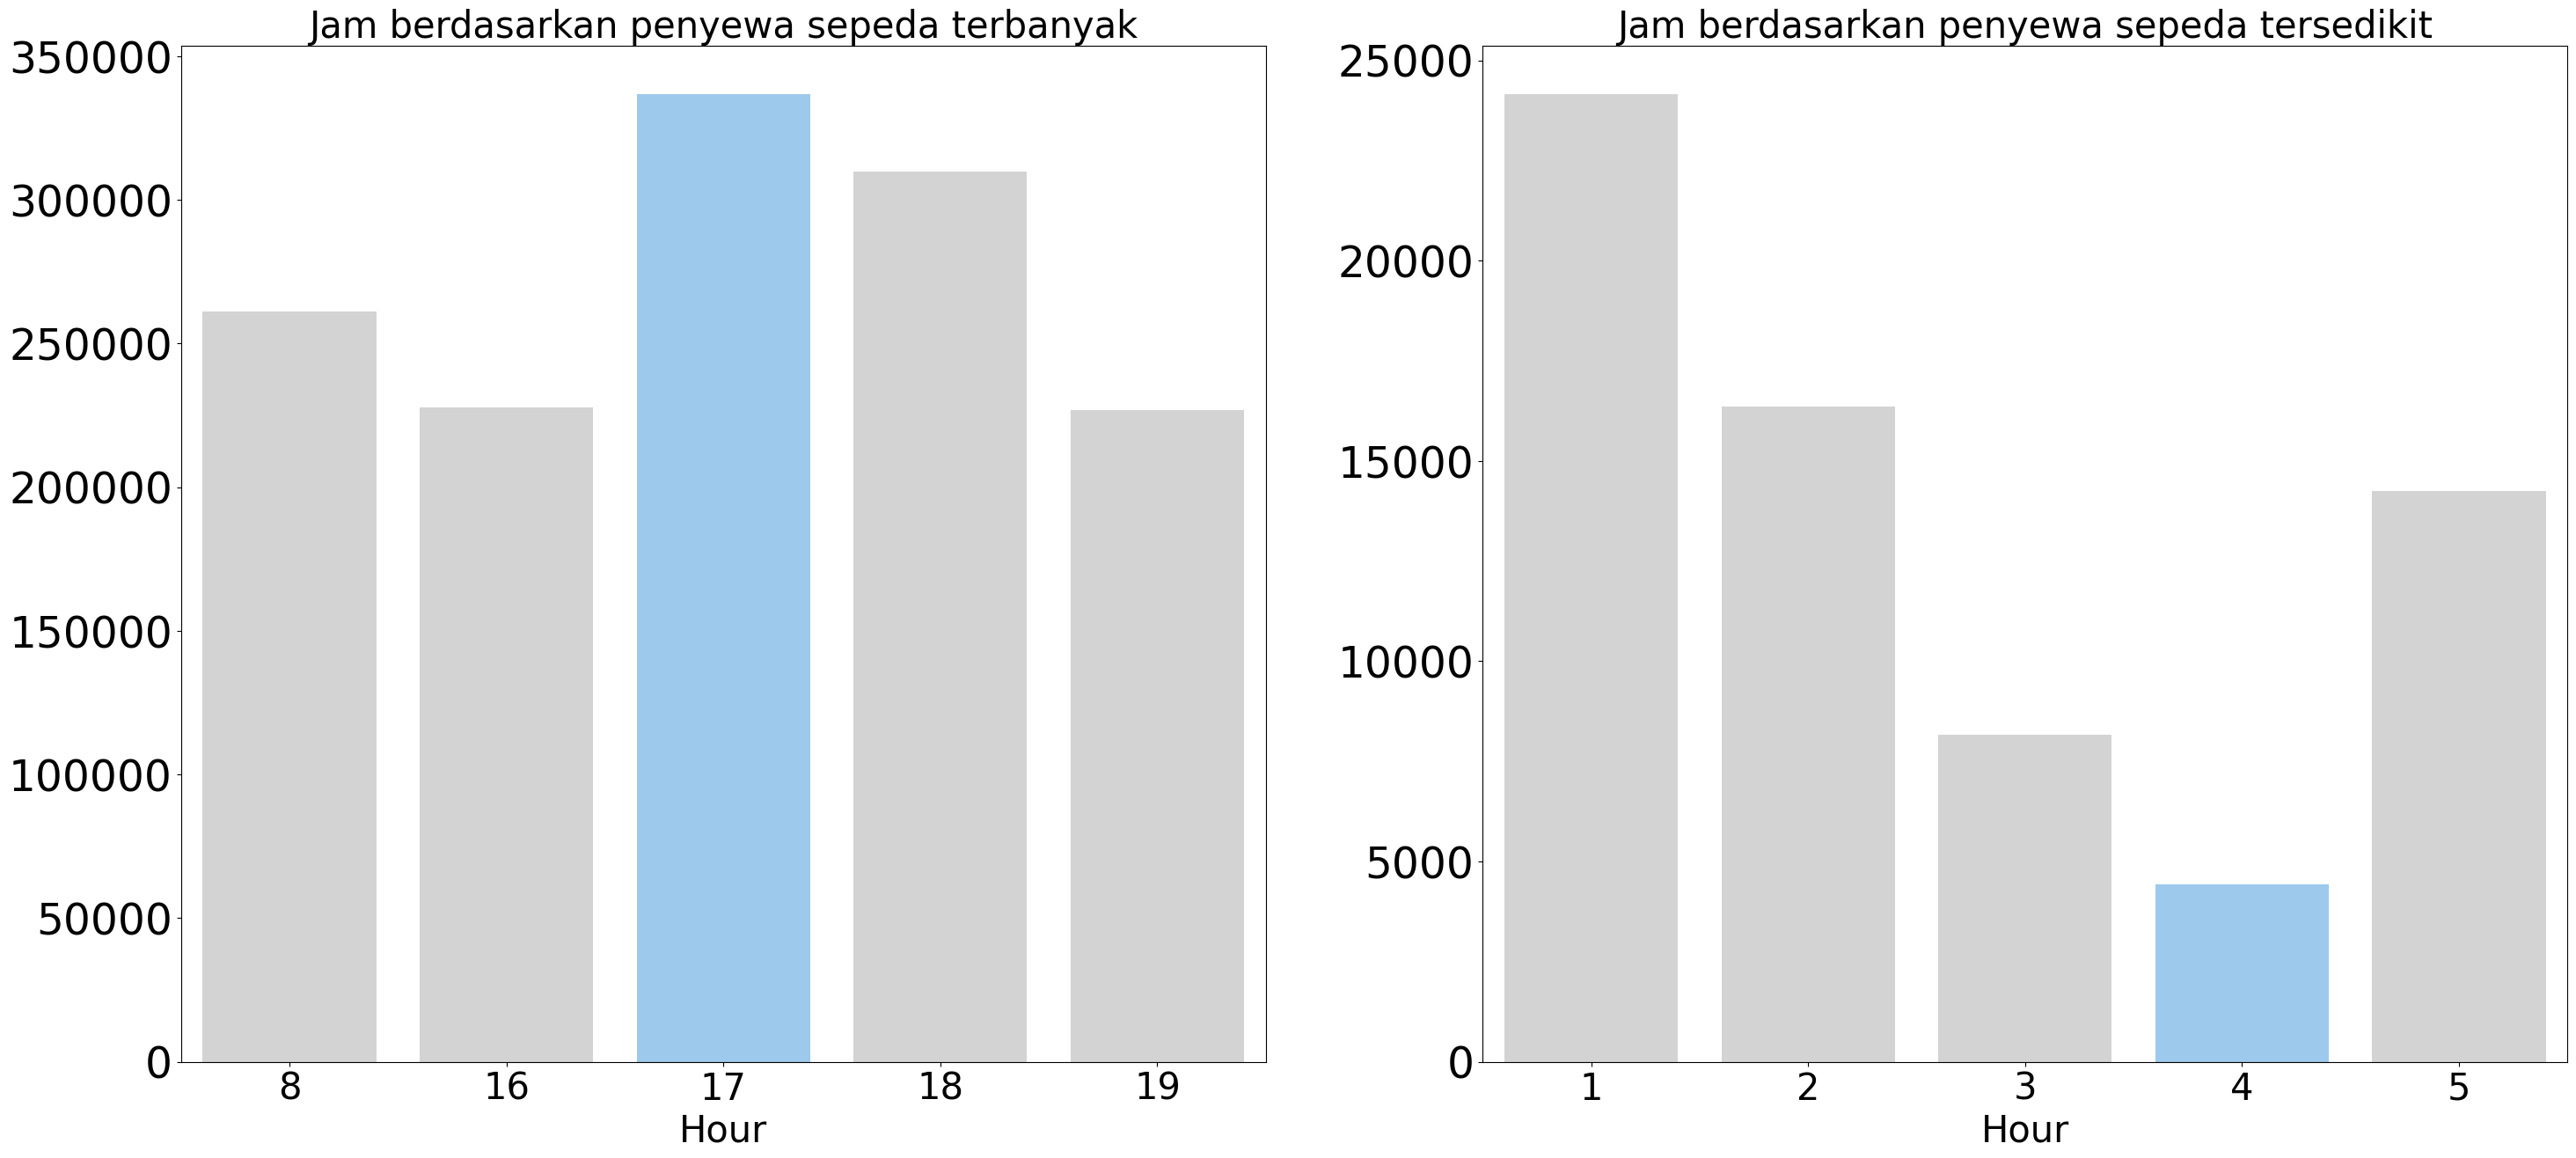

In [32]:
#membuat 2 buah barchart sebagai perbandingan pelanggan terbanyak maupun tersedikit
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

#membuat barplot dengan pelanggan terbanyak
sns.barplot(x="hour",
            y="count",
            data=sum_order_hour_df.head(5),
            palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"],
            ax=ax[0])

#Mengatur judul dan label pada barchart pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel('Hour', fontsize = 30)
ax[0].set_title('Jam berdasarkan penyewa sepeda terbanyak', loc = 'center', fontsize = 30)
ax[0].tick_params(axis = 'y', labelsize = 35)
ax[0].tick_params(axis = 'x', labelsize = 30)

#membuat barplot dengan pelanggan tersedikit
sns.barplot(x="hour",
            y="count",
            data=sum_order_hour_df.tail(5),
            palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"],
            ax=ax[1])

#Mengatur judul dan label pada barchart kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel('Hour', fontsize = 30)
ax[1].set_title('Jam berdasarkan penyewa sepeda tersedikit', loc = 'center', fontsize = 30)
ax[1].tick_params(axis = 'y', labelsize = 35)
ax[1].tick_params(axis = 'x', labelsize = 30)


**Insight:**
Berdasarkan grafik diatas, dapat kita ketahui bahwa pelanggan melakukan sewa terbanyak pada pukul 17.00, sedangkan pelanggan melakukan sewa paling sedikit pada pukul 04.00

### Pertanyaan 2:

Pada musim apakah permimtaan sewa sepeda paling tinggi?

<ipython-input-33-d9903c5f8188>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


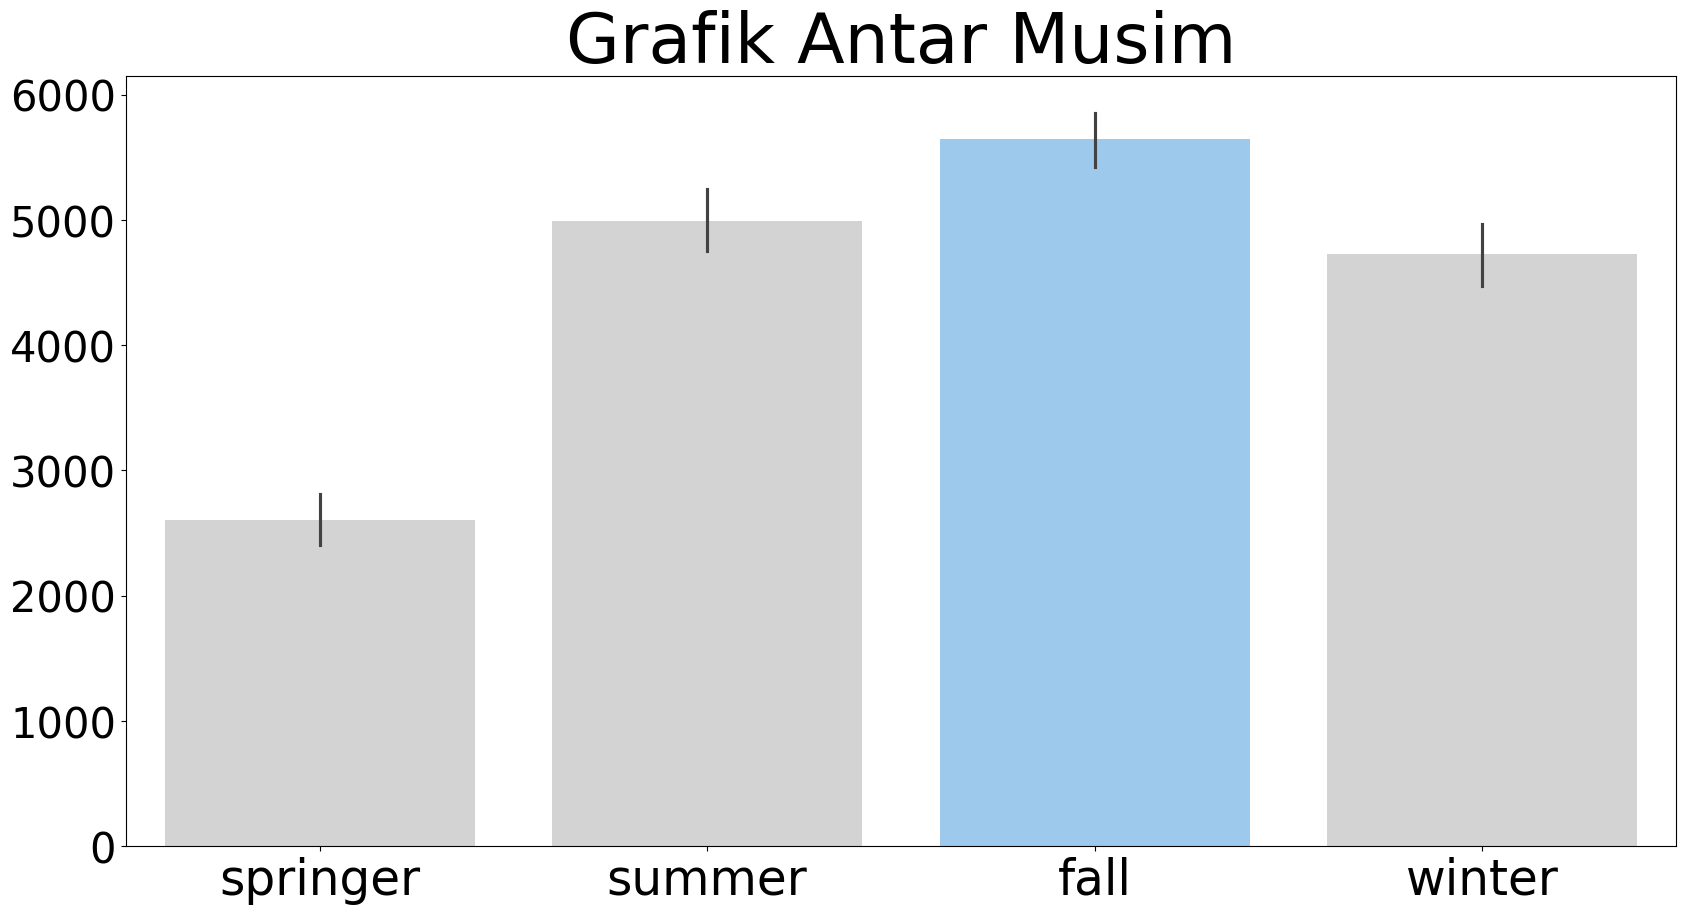

In [33]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(
        y="count",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3",],
        ax=ax
    )
# mengatur judul, label y dan x, serta tick params untuk barchart
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# menampilkan plot
plt.show()

**Insight:**
Berdasarkan grafik diatas, dapat kita ketahui bahwa pelanggan melakukan sewa terbanyak pada musim fall(gugur)

# Pertanyaan 3

Berapa perbandingan pelanggan yang menjadi member dengan bukan member yang melakukan sewa sepeda?

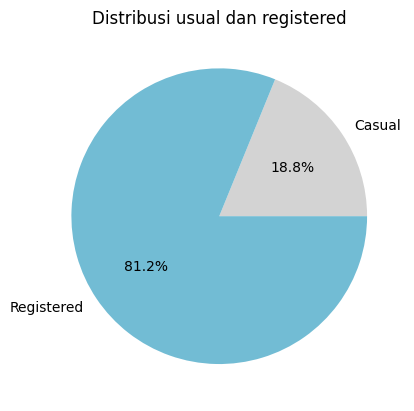

In [34]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])
plt.title('Distribusi usual dan registered')
plt.show()

**Insight:**
Berdasarkan grafik diatas, dapat kita ketahui bahwa perbandingan pelanggan yang telah menjadi member dengan pelanggan yang belum menjadi member adalah 81,2% : 18,8%, dengan pelanggan yang telah menjadi member memiliki jumlah lebih banyak

# Pertanyaan 4

Berapa perbandingan pelanggan yang menyewa sepeda pada hari kerja dan hari libur?

<ipython-input-35-78a2bbe0a5d0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = day_df.groupby(by='status_day').agg({


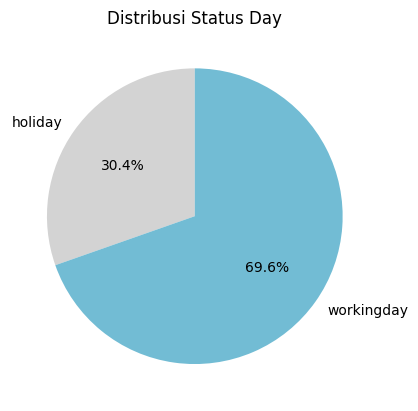

In [35]:
#melakukan grouping dengan kolom status_day dan count
grouped_data = day_df.groupby(by='status_day').agg({
    'count': ['sum']
}).reset_index()

# Menghapus multi-index pada kolom count
grouped_data.columns = ['status_day', 'count_sum']

# Membuat pie chart
labels = grouped_data['status_day']
sizes = grouped_data['count_sum']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=["#D3D3D3", "#72BCD4"])
plt.title('Distribusi Status Day')
plt.show()

**Insight:**
Berdasarkan grafik diatas, dapat kita ketahui bahwa perbandingan pelanggan melakukan sewa pada hari kerja dengan pelanggan melakukan sewa pada hari libur adalah 69,6% : 30.4%, dengan pelanggan melakukan sewa pada hari kerja memiliki jumlah lebih banyak.

# Pertanyaan 5

Bagaimana performa penyewaan sepeda dalam 2 tahun terakhir?

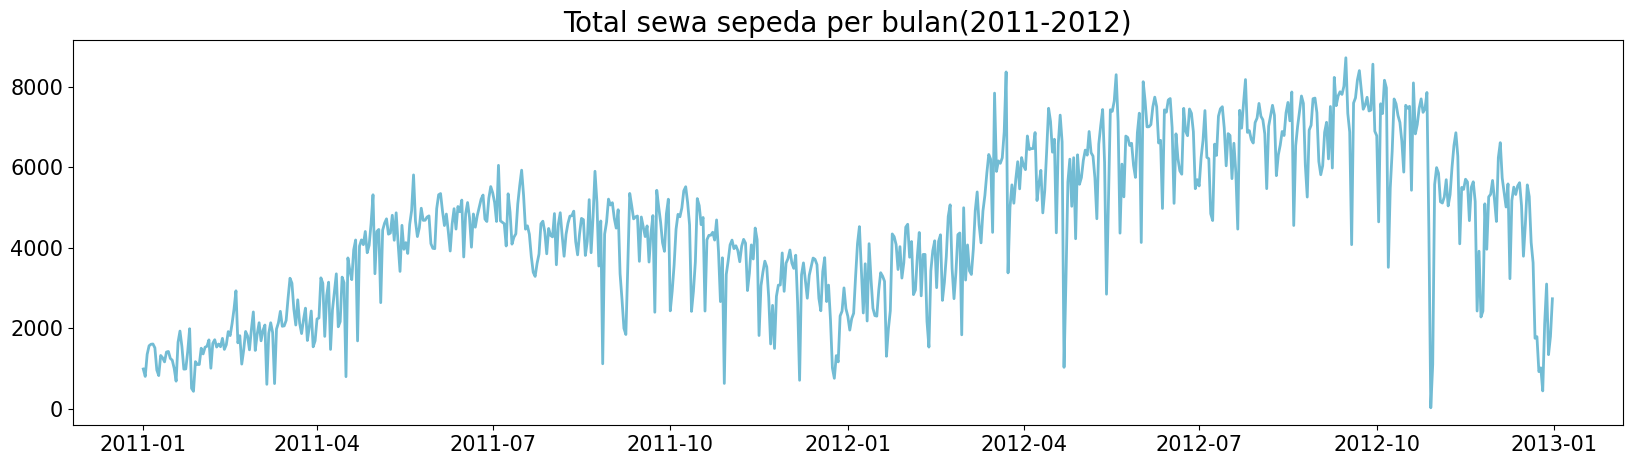

In [36]:
#membuat figure dengan ukuran (10, 5)
plt.figure(figsize=(20, 5))
#Membuat line plot untuk total pelanggan per hari
plt.plot(
    day_df["dteday"],
    day_df["count"],
    linewidth=2,
    color="#72BCD4"
)
#Mengatur judul dan label pada linechart
plt.title("Total sewa sepeda per bulan(2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**Insight:**
Berdasarkan grafik diatas, dapat kita ketahui bahwa penyewaan sepeda mengalami kenaikan pada sekitar bulan Juli - Oktober dan mulai mengalami penurunan selama November - Januari

## Conclusion

- Pada jam berapa permintaan sewa sepeda paling tinggi?
Kita ketahui bahwa pelanggan melakukan sewa terbanyak pada pukul 17.00
- Pada musim apakah permintaan sewa sepeda paling tinggi?
Kita ketahui bahwa pelanggan melakukan sewa terbanyak pada musim fall(gugur)
- Berapa perbandingan pelanggan yang menjadi member dengan bukan member yang melakukan sewa sepeda?
Perbandingan pelanggan yang telah menjadi member dengan pelanggan yang belum menjadi member adalah 81,2% : 18,8%
- Berapa perbandingan pelanggan yang menyewa sepeda pada hari kerja dan hari libur?
Perbandingan pelanggan melakukan sewa pada hari kerja dengan pelanggan melakukan sewa pada hari libur adalah 69,6% : 30.4%
- Bagaimana performa penyewaan sepeda dalam 2 tahun terakhir?
Penyewaan sepeda mengalami kenaikan pada sekitar bulan Juli - Oktober dan mulai mengalami penurunan selama November - Januari

## Analisis Lanjutan (Opsional)

**Analisis Clustering**

**Sewa sepeda berdasarkan cuaca**

Pada tahap ini, kita ingin mengetahui pada cuaca apa terjadi penyewaan sepeda terbanyak. Kita melakukan grouping terlebih dahulu berdasarkan situasi cuaca ('weather_situation'), seletah itu kita akan memuat jumlah dari pelanggan dan kita sorting secara descending

In [37]:
#Melakukan analisis klustering untuk sewa sepeda berdasarkan cuaca
hour_df.groupby(by="weather_situation")['count'].nunique().sort_values(ascending=False)

<ipython-input-37-66ff70ac4d2b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weather_situation")['count'].nunique().sort_values(ascending=False)


,count
weather_situation,
Clear,848
Misty,649
Light Rain Snow,368
Heavy Rain Snow,3


Berdasarkan tabel di atas, kita bisa lihat bahwa pelanggan paling banyak menyewa sepeda ketika situasi cuaca cerah

**Sewa sepeda berdasarkan hari**

Pada tahap ini, kita ingin mengetahui pada cuaca apa terjadi penyewaan sepeda terbanyak. Kita melakukan grouping terlebih dahulu berdasarkan hari ('weekday'), seletah itu kita akan memuat jumlah dari pelanggan dan kita sorting secara descending

In [38]:
#Melakukan analisis klustering untuk pelanggan sewa sepeda berdasarkan hari
hour_df.groupby(by="weekday")['count'].sum().sort_values(ascending=False)

<ipython-input-38-0b3ee56a2892>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weekday")['count'].sum().sort_values(ascending=False)


,count
weekday,
tuesday,487790
monday,485395
saturday,477807
thursday,473048
sunday,469109
friday,455503
wednesday,444027


Berdasarkan tabel diatas, bisa dilihat bahwa pengguna sering menyewa sepeda pada hari thursday(Kamis).